In [2]:
import optuna
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import normalize
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


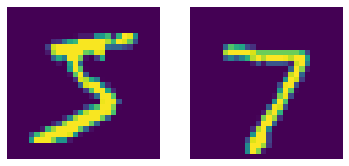

In [3]:
##Loading the data
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

## plots
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.axis('off');
ax1.imshow(x_train[0]);
ax2.imshow(x_valid[0]);
ax2.axis('off');


In [4]:

BATCHSIZE = 64
EPOCHS = 10
CLASSES = 10
def objective(trail):

    ##Loading the data
    (x_train,y_train),(x_valid,y_valid) = mnist.load_data()

    #normalising the data
    x_train = normalize(x_train, axis = 1)
    x_valid = normalize(x_valid, axis = 1)

    ##model
    n_layers = trail.suggest_int('num_layers',1,4)
    model = Sequential()
    model.add(Flatten())
    for i in range(n_layers):
        hidden = int(trail.suggest_loguniform(f'layer:{i+1}',20,128))
        model.add(Dense(hidden,activation = 'relu'))
    model.add(Dense(CLASSES,activation = 'softmax'))

    ##learning_rate
    lr = trail.suggest_float('lr',1e-5,1e-1,log = True)
    optimize = trail.suggest_categorical('optimizer',['Adam','SGD'])
    
    ## compile
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer =  trail.suggest_categorical('optimizer',['Adam','SGD']), metrics = ['accuracy'] )

    ##fit
    model.fit(x_train,y_train,validation_data=(x_valid, y_valid),shuffle=True,
        batch_size=BATCHSIZE,
        epochs=EPOCHS,
        verbose=False
    )

    score = model.evaluate(x_valid,y_valid,verbose = 0)
    return score[1]

if __name__ == '__main__':
    study = optuna.create_study(sampler = optuna.samplers.TPESampler(multivariate=True),
    direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("{}: {}".format(key, value))




/root/venv/lib/python3.7/site-packages/optuna/samplers/_tpe/sampler.py:191: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  ExperimentalWarning,
[I 2021-03-01 14:51:47,658] A new study created in memory with name: no-name-2fab3f02-1926-4e9e-99cc-710da841230b
[I 2021-03-01 14:52:05,816] Trial 0 finished with value: 0.9386000037193298 and parameters: {'num_layers': 3, 'layer:1': 39.80718310272912, 'layer:2': 90.3057799294738, 'layer:3': 63.39099507425451, 'lr': 0.0001821407402866383, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.9386000037193298.
[I 2021-03-01 14:52:20,148] Trial 1 finished with value: 0.9125999808311462 and parameters: {'num_layers': 1, 'layer:1': 29.593197814177163, 'lr': 0.029005208594547187, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.9386000037193298.
[I 2021-03-01 14:52:34,492] Trial 2 finished with value: 0.9121999740600586 and parameters: {'num_layers': 1, 'layer:1': 29.373194587753648

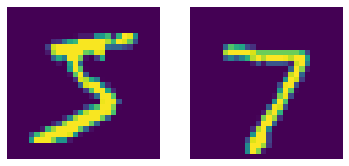

In [5]:
##Loading the data
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

## plots
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.axis('off');
ax1.imshow(x_train[0]);
ax2.imshow(x_valid[0]);
ax2.axis('off');


In [6]:
n_train_iter = 100

BATCHSIZE = 64
EPOCHS = 10
CLASSES = 10
def objective(trail):

    ##Loading the data
    (x_train,y_train),(x_valid,y_valid) = mnist.load_data()

    #normalising the data
    x_train = normalize(x_train, axis = 1)
    x_valid = normalize(x_valid, axis = 1)

    ##model
    n_layers = trail.suggest_int('num_layers',1,4)
    model = Sequential()
    model.add(Flatten())
    for i in range(n_layers):
        hidden = int(trail.suggest_loguniform(f'layer:{i+1}',20,128))
        model.add(Dense(hidden,activation = 'relu'))
    model.add(Dense(CLASSES,activation = 'softmax'))

    ##learning_rate
    lr = trail.suggest_float('lr',1e-5,1e-1,log = True)
    optimize = trail.suggest_categorical('optimizer',['Adam','SGD'])
    
    ## compile
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer =trail.suggest_categorical('optimizer',['Adam','SGD']), metrics = ['accuracy'] )

    ##fit
    model.fit(x_train,y_train,validation_data=(x_valid, y_valid),shuffle=True,
        batch_size=BATCHSIZE,
        epochs=EPOCHS,
        verbose=False
    )

    score = model.evaluate(x_valid,y_valid,verbose = 0)
    return score[1]

if __name__ == '__main__':
    study = optuna.create_study(sampler = optuna.samplers.TPESampler(multivariate=True),
    direction="maximize",
    pruner=optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=n_train_iter, reduction_factor=3))
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("{}: {}".format(key, value))




[I 2021-03-01 15:02:53,079] A new study created in memory with name: no-name-100dd19e-6eeb-4bb7-9518-c8189b4c98aa
[I 2021-03-01 15:03:13,506] Trial 0 finished with value: 0.932200014591217 and parameters: {'num_layers': 3, 'layer:1': 57.140121548081986, 'layer:2': 26.60109847298148, 'layer:3': 39.25519574501006, 'lr': 2.7678663275881218e-05, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.932200014591217.
[I 2021-03-01 15:03:31,596] Trial 1 finished with value: 0.9279999732971191 and parameters: {'num_layers': 4, 'layer:1': 24.842667711208946, 'layer:2': 71.57767057442096, 'layer:3': 44.58733950056079, 'layer:4': 103.69780062891127, 'lr': 0.001505011553647264, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.932200014591217.
[I 2021-03-01 15:03:51,340] Trial 2 finished with value: 0.9664999842643738 and parameters: {'num_layers': 3, 'layer:1': 28.8676243810646, 'layer:2': 49.07255087566735, 'layer:3': 31.146045240929787, 'lr': 0.013916158660806763, 'optimizer': 'Adam'}. Best is tr

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90830cb7-800f-4f81-a6d6-ca5a5901ef46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>